# Reducción de dimensiones:

In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.24.2


In [3]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.6.3


In [4]:
# En produccion eliminar, se incluye por informacion
import sklearn
print(f'Sklearn version: {sklearn.__version__}')

from sklearn.decomposition import PCA

Sklearn version: 1.3.0


In [5]:
# En produccion eliminar, se incluye por informacion
import seaborn as sns
print(f'Seaborn version: {sns.__version__}')

Seaborn version: 0.12.2


In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
import plotly.express as px

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df_1 = pd.read_csv('/home/pedro/TpIAFiuba/Datos/df_train.csv', encoding = 'unicode_escape')
df_2 = pd.read_csv('/home/pedro/TpIAFiuba/Datos/df_test.csv', encoding = 'unicode_escape')

In [10]:
df = pd.concat([df_1, df_2])

In [11]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,26.66,0,0,0,0,5,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,9,0,0,0,0
1,26.61,0,0,0,3,4,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,9,1,0,1,0
2,30.04,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,8,0,0,0,0
3,30.52,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,7,0,0,0,0
4,31.46,1,0,0,25,15,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,4,0,0,0,0


In [12]:
df['HeartDisease']=pd.Categorical(df['HeartDisease'])
my_color= df['HeartDisease'].cat.codes
df = df.drop('HeartDisease', axis=1)

# PCA sin escalar:

### PCA con 3 componentes:

In [13]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [14]:
pca.explained_variance_

array([118.24610261,  56.03394949,  40.51536237])

In [15]:
pca.explained_variance_ratio_

array([0.53520192, 0.25361916, 0.1833794 ])

In [16]:
sum(pca.explained_variance_ratio_)

0.9722004922540329

In [17]:
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

In [18]:
result.head()

,PCA0,PCA1,PCA2
0,-4.561,3.541,-1.281
1,-2.541,1.162,-1.735
2,-6.706,-0.931,2.112
3,-6.657,-0.952,2.584
4,22.492,-0.955,0.107


In [19]:
finalDf = pd.concat([result, my_color], axis = 1)
finalDf.columns = ['PCA0', 'PCA1', 'PCA2', 'target']

In [20]:
finalDf.head()

,PCA0,PCA1,PCA2,target
0,-4.561,3.541,-1.281,0
1,-2.541,1.162,-1.735,0
2,-6.706,-0.931,2.112,0
3,-6.657,-0.952,2.584,0
4,22.492,-0.955,0.107,0


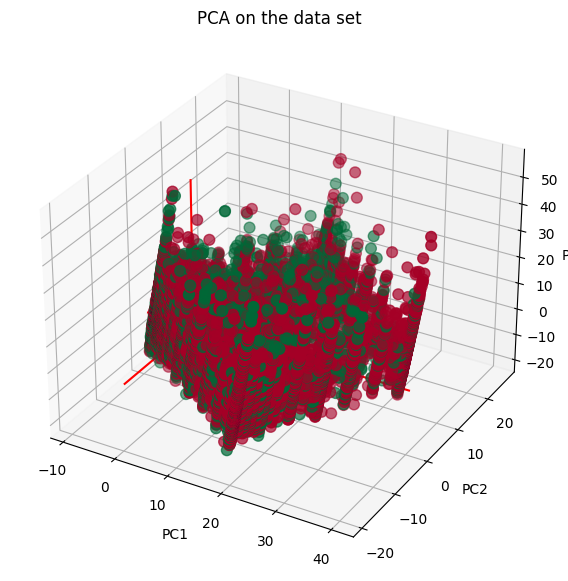

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="RdYlGn_r", s=60)

xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the data set")
plt.show();

Guardamos el resultado para poder hacer un grafico interactivo en otro notebook. No lo hicimos en este porque demandaba muchos requisitos.

In [23]:
finalDf.to_csv('/home/pedro/TpIAFiuba/Datos/PCA_sin_escalar.csv', encoding='latin-1', header=True, index=False, sep=',', decimal='.')

In [23]:
#fig = px.scatter_3d(finalDf, x='PCA0', y='PCA1', z='PCA2',
#              color='target', color_continuous_scale=['green', 'red'], title = 'PCA on the data set')
#fig.show()

### PCA con 2 componentes:

In [24]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [25]:
pca.explained_variance_

array([118.24610261,  56.03394949])

In [26]:
pca.explained_variance_ratio_

array([0.53520192, 0.25361916])

In [27]:
sum(pca.explained_variance_ratio_)

0.7888210875372283

In [28]:
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(2)], index=df.index)

In [29]:
result.head()

,PCA0,PCA1
0,-4.561,3.541
1,-2.541,1.162
2,-6.706,-0.931
3,-6.657,-0.952
4,22.492,-0.955


In [30]:
finalDf = pd.concat([result, my_color], axis = 1)

In [31]:
finalDf.head()

,PCA0,PCA1,0
0,-4.561,3.541,0
1,-2.541,1.162,0
2,-6.706,-0.931,0
3,-6.657,-0.952,0
4,22.492,-0.955,0


In [32]:
finalDf.columns = ['principal component 1', 'principal component 2', 'target']

In [33]:
finalDf.head()

,principal component 1,principal component 2,target
0,-4.561,3.541,0
1,-2.541,1.162,0
2,-6.706,-0.931,0
3,-6.657,-0.952,0
4,22.492,-0.955,0


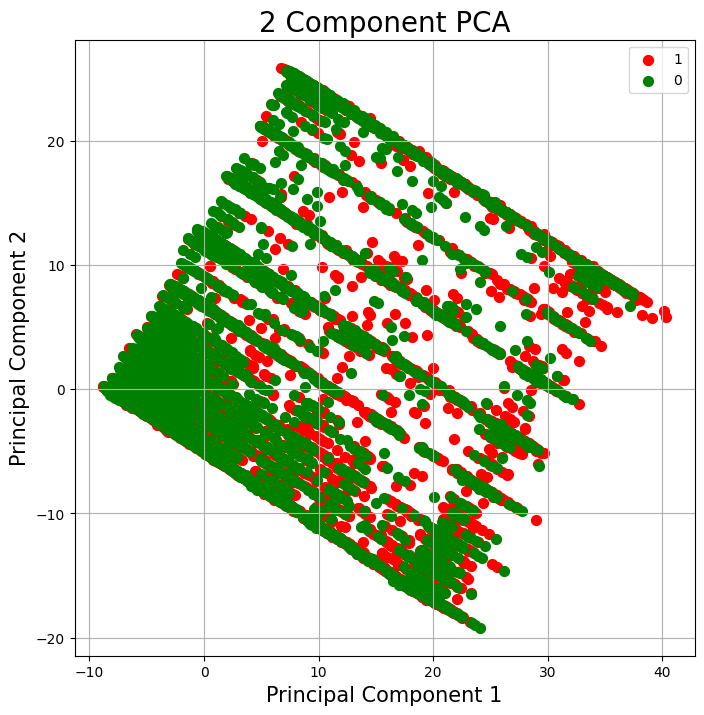

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# PCA con escalar:

In [35]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer
0,26.66,0,0,0,0,5,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,9,0,0,0
1,26.61,0,0,0,3,4,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,9,1,0,1
2,30.04,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,8,0,0,0
3,30.52,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,7,0,0,0
4,31.46,1,0,0,25,15,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,4,0,0,0


In [36]:
df.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer
count,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000,54734.000
mean,28.681,0.494,0.056,0.093,5.495,4.269,0.244,0.527,0.473,0.383,0.431,0.470,0.577,0.079,0.191,0.872,0.221,0.714,0.223,0.497,0.545,7.133,0.158,0.078,0.141
std,6.452,0.500,0.229,0.291,10.019,8.520,0.430,0.499,0.499,0.486,0.495,0.499,0.494,0.269,0.393,0.334,0.415,0.452,0.417,0.500,0.498,1.604,0.365,0.269,0.348
min,12.210,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
25%,24.330,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,6.000,0.000,0.000,0.000
50%,27.530,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,7.000,0.000,0.000,0.000
75%,31.910,1.000,0.000,0.000,5.000,4.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,8.000,0.000,0.000,0.000
max,83.330,1.000,1.000,1.000,30.000,30.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,22.000,1.000,1.000,1.000


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
features = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']

In [39]:
x = df.loc[:,features].values

In [40]:
x

array([[26.66,  9.  ,  0.  ,  5.  ],
       [26.61,  9.  ,  3.  ,  4.  ],
       [30.04,  8.  ,  0.  ,  0.  ],
       ...,
       [23.49,  6.  ,  0.  ,  0.  ],
       [29.99,  5.  ,  0.  , 15.  ],
       [25.84,  7.  ,  0.  ,  3.  ]])

In [41]:
x = StandardScaler().fit_transform(x)

In [42]:
x

array([[-0.31323653,  1.16356978, -0.54847682,  0.08580575],
       [-0.32098564,  1.16356978, -0.24903111, -0.0315596 ],
       [ 0.21060366,  0.54030732, -0.54847682, -0.50102099],
       ...,
       [-0.80453043, -0.70621761, -0.54847682, -0.50102099],
       [ 0.20285455, -1.32948007, -0.54847682,  1.25945923],
       [-0.44032202, -0.08295515, -0.54847682, -0.14892495]])

In [43]:
data_escalada = pd.DataFrame(data = x, columns = features)

In [44]:
data_escalada.head()

,BMI,SleepTime,PhysicalHealth,MentalHealth
0,-0.313,1.164,-0.548,0.086
1,-0.321,1.164,-0.249,-0.032
2,0.211,0.540,-0.548,-0.501
3,0.285,-0.083,-0.548,-0.501
4,0.431,-1.953,1.947,1.259


In [45]:
df['BMI'] = data_escalada['BMI']
df['SleepTime'] = data_escalada['SleepTime']
df['PhysicalHealth'] = data_escalada['PhysicalHealth']
df['MentalHealth'] = data_escalada['MentalHealth']

In [46]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-0.313,0,0,0,-0.548,0.086,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1.164,0,0,0
1,-0.321,0,0,0,-0.249,-0.032,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1.164,1,0,1
2,0.211,0,0,0,-0.548,-0.501,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0.540,0,0,0
3,0.285,0,0,0,-0.548,-0.501,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,-0.083,0,0,0
4,0.431,1,0,0,1.947,1.259,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,-1.953,0,0,0


### PCA con 3 componentes:

In [47]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [48]:
pca.explained_variance_

array([1.3824959 , 0.95047324, 0.91353792])

In [49]:
pca.explained_variance_ratio_

array([0.18320201, 0.12595235, 0.12105785])

In [50]:
sum(pca.explained_variance_ratio_)

0.4302122182248623

In [51]:
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

In [52]:
result.head()

,PCA0,PCA1,PCA2
0,-0.785,0.109,0.842
1,-0.666,0.043,1.026
2,-0.546,0.531,0.219
3,-0.573,0.442,-0.453
4,3.075,-0.634,-0.770


In [53]:
finalDf = pd.concat([result, my_color], axis = 1)
finalDf.columns = ['PCA0', 'PCA1', 'PCA2', 'target']

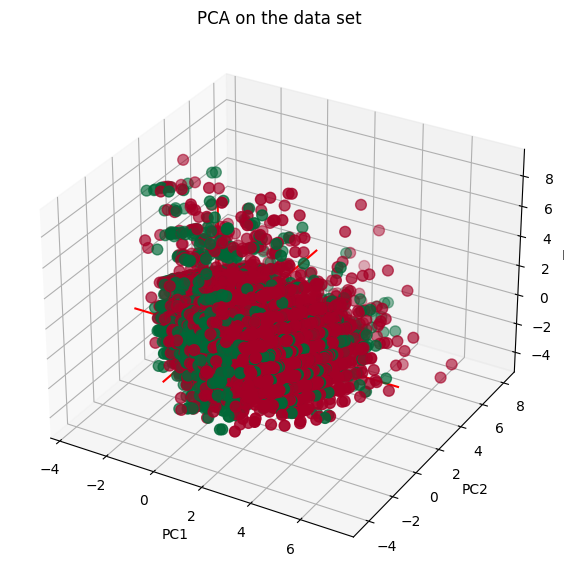

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap='RdYlGn_r', s=60)

xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the data set")
plt.show();

Guardamos el resultado para poder hacer un grafico interactivo en otro notebook. No lo hicimos en este porque demandaba muchos requisitos.

In [55]:
finalDf.to_csv('/home/pedro/TpIAFiuba/Datos/PCA_con_escalar.csv', encoding='latin-1', header=True, index=False, sep=',', decimal='.')

In [56]:
#fig = px.scatter_3d(finalDf, x='PCA0', y='PCA1', z='PCA2',
#              color='target', color_continuous_scale=['green', 'red'], title = 'PCA on the data set')
#fig.show()

### PCA con 2 componentes:

In [57]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [58]:
pca.explained_variance_

array([1.3824959 , 0.95047326])

In [59]:
pca.explained_variance_ratio_

array([0.18320201, 0.12595236])

In [60]:
sum(pca.explained_variance_ratio_)

0.3091543683957708

In [61]:
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(2)], index=df.index)

In [62]:
finalDf = pd.concat([result, my_color], axis = 1)

In [63]:
finalDf = pd.concat([result, my_color], axis = 1)
finalDf.columns = ['principal component 1', 'principal component 2', 'target']

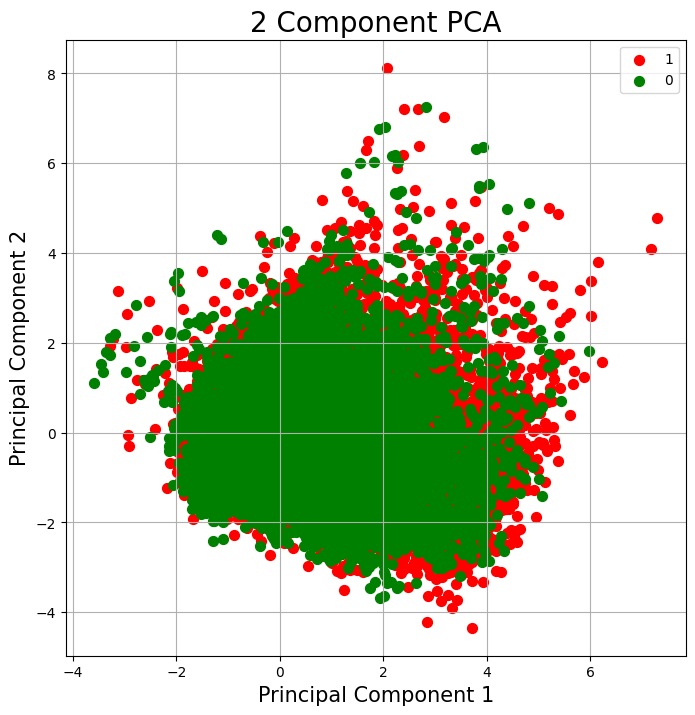

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Gráficos interactivos de PCA:

https://colab.research.google.com/drive/1rSfxCYhfLoH4zMpxIq-Megpz0LF9toKe?usp=sharing

# UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction):

UMAP is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

In [88]:
import umap.umap_ as umap

### UMAP con 3 componentes:

In [89]:
reducer = umap.UMAP(n_components = 3)

In [90]:
reducer.fit(df)

UMAP(n_components=3, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [91]:
result=pd.DataFrame(reducer.transform(df), columns=['UMAP%i' % i for i in range(3)], index=df.index)

In [92]:
result.head()

,UMAP0,UMAP1,UMAP2
0,-1.664,2.323,3.883
1,9.900,-0.662,3.834
2,10.557,1.983,4.578
3,-1.196,2.411,5.570
4,6.709,0.313,3.689


In [93]:
finalDf = pd.concat([result, my_color], axis = 1)
finalDf.columns = ['UMAP0', 'UMAP1', 'UMAP2', 'target']

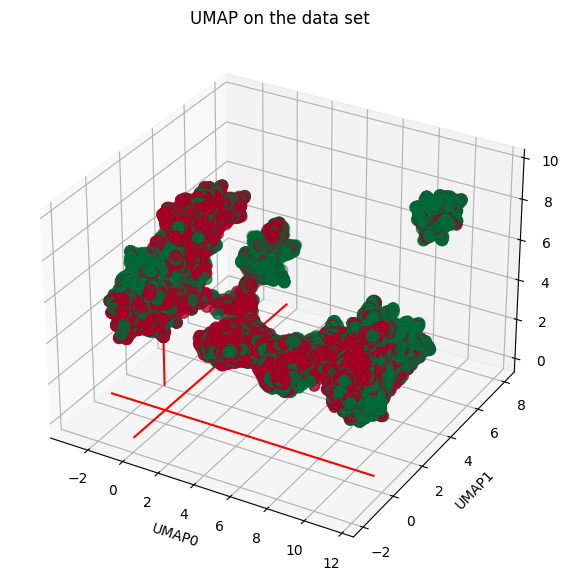

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['UMAP0'], result['UMAP1'], result['UMAP2'], c=my_color, cmap='RdYlGn_r', s=60)

xAxisLine = ((min(result['UMAP0']), max(result['UMAP0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['UMAP1']), max(result['UMAP1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['UMAP2']), max(result['UMAP2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
ax.set_xlabel("UMAP0")
ax.set_ylabel("UMAP1")
ax.set_zlabel("UMAP2")
ax.set_title("UMAP on the data set")
plt.show();

### UMAP con 2 componentes:

In [95]:
reducer = umap.UMAP(n_components = 2)

In [96]:
reducer.fit(df)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [97]:
result=pd.DataFrame(reducer.transform(df), columns=['UMAP%i' % i for i in range(2)], index=df.index)

In [98]:
result.head()

,UMAP0,UMAP1
0,-2.953,3.334
1,12.468,-1.074
2,11.591,1.853
3,-0.375,2.541
4,7.058,-0.849


In [99]:
finalDf = pd.concat([result, my_color], axis = 1)
finalDf.columns = ['UMAP0', 'UMAP1', 'target']

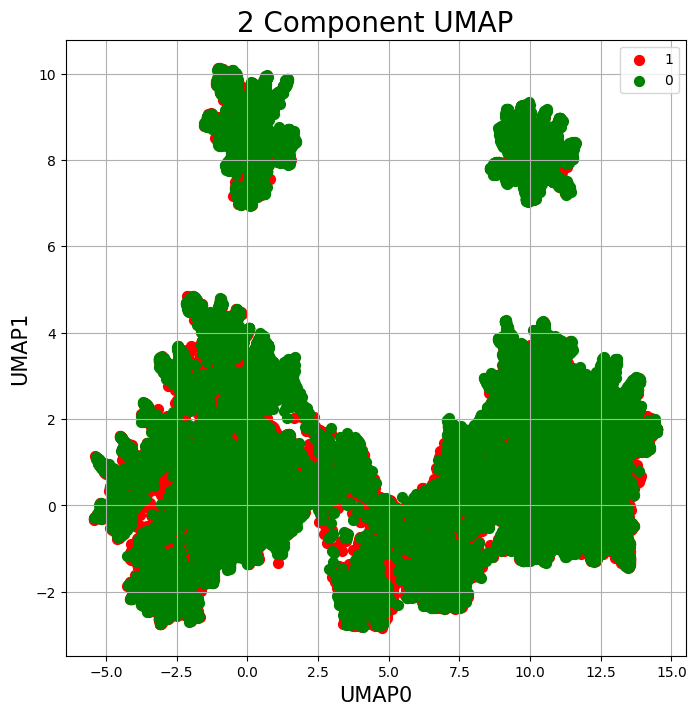

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP0', fontsize = 15)
ax.set_ylabel('UMAP1', fontsize = 15)
ax.set_title('2 Component UMAP', fontsize = 20)


targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'UMAP0']
               , finalDf.loc[indicesToKeep, 'UMAP1']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()